<a href="https://colab.research.google.com/github/FtmMoradian/Brain-tumor-Diagnosis-with-AI/blob/main/Brain_tumor_Classification_with_original_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Model for Original Data

Import Libraries

In [ ]:
import os
import keras
import numpy as np
from sklearn.svm import SVC
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from matplotlib.pyplot import *
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
plt.style.use('dark_background')

Preprocess

In [ ]:
data = []
category = []

In [ ]:
for filename in os.scandir("/content/drive/MyDrive/Brain_Tumor_Classification /Data Set/no"):
    if filename.is_file():
        img = Image.open(filename.path)
        img = img.resize(size=(32,32))
        img = img.convert('L')
        data.append(np.array(img).flatten())
        category.append(0)
        del img

In [ ]:
for filename in os.scandir("/content/drive/MyDrive/Brain_Tumor_Classification /Data Set/yes"):
    if filename.is_file():
        img = Image.open(filename.path)
        img = img.resize(size=(32,32))
        img = img.convert('L')
        data.append(np.array(img).flatten())
        category.append(1)
        del img

In [ ]:
x,y = np.array(data),category

In [ ]:
x.shape

(226, 1024)

In [ ]:
len(y)

226

Split Train and Test Model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

Train Model

In [ ]:
svm_model = SVC(kernel='linear',C = 0.1,random_state=0)

In [ ]:
svm_model.fit(x_train,y_train)

SVC(C=0.1, kernel='linear', random_state=0)

Accuracy

In [ ]:
print("The score is :",svm_model.score(x_train,y_train)*100,"%")

The score is : 100.0 %


In [ ]:
print("The score is :",svm_model.score(x_test,y_test)*100,"%")

The score is : 80.88235294117648 %


#Logistic Regression Model for Original Data

Preprocess

In [ ]:
data = []
category = []

In [ ]:
for filename in os.scandir("/content/drive/MyDrive/Brain_Tumor_Classification /Data Set/no"):
    if filename.is_file():
        img = Image.open(filename.path)
        img = img.resize(size=(32,32))
        img = img.convert('L')
        data.append(np.array(img).flatten())
        category.append(0)
        del img

In [ ]:
for filename in os.scandir("/content/drive/MyDrive/Brain_Tumor_Classification /Data Set/yes"):
    if filename.is_file():
        img = Image.open(filename.path)
        img = img.resize(size=(32,32))
        img = img.convert('L')
        data.append(np.array(img).flatten())
        category.append(1)
        del img

In [ ]:
x,y = np.array(data),category

In [ ]:
x.shape

(226, 1024)

In [ ]:
len(y)

226

Split Train and Test Model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

Train Model

In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy

In [ ]:
print("The score is :",lg.score(x_train,y_train)*100,"%")

The score is : 100.0 %


In [ ]:
print("The score is :",lg.score(x_test,y_test)*100,"%")

The score is : 79.41176470588235 %


# KNN Model for Original Data

Preprocess

In [ ]:
for filename in os.scandir("/content/drive/MyDrive/Brain_Tumor_Classification /Data Set/yes"):
    if filename.is_file():
        img = Image.open(filename.path)
        img = img.resize(size=(32,32))
        img = img.convert('L')
        data.append(np.array(img).flatten())
        category.append(1)
        del img

In [ ]:
x,y = np.array(data),category

In [ ]:
x.shape

(365, 1024)

In [ ]:
len(y)

365

Split Train and Test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

Train Model

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5,weights="uniform",algorithm="auto")

In [ ]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

Accuracy

In [ ]:
print("The score is:",knn_model.score(x_train,y_train)*100,"%")

The score is: 87.84313725490196 %


In [ ]:
print("The score is:",knn_model.score(x_test,y_test)*100,"%")

The score is: 82.72727272727273 %


#CNN for Original Data

Encode

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Normal
# 1 - Tumor

OneHotEncoder()

Preprocess

In [ ]:
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/Brain_Tumor_Classification /Data Set/no'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/Brain_Tumor_Classification /Data Set/yes"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(129, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(129,2)

Split Train and Test Model

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

Train Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [ ]:
y_train.shape

(103, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 30, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/30
3/3 [==============================] - 14s 4s/step - loss: 59.6925 - val_loss: 104.2060
Epoch 2/30
3/3 [==============================] - 13s 2s/step - loss: 14.4273 - val_loss: 26.2274
Epoch 3/30
3/3 [==============================] - 7s 2s/step - loss: 6.5395 - val_loss: 79.2447
Epoch 4/30
3/3 [==============================] - 8s 2s/step - loss: 6.7515 - val_loss: 52.4186
Epoch 5/30
3/3 [==============================] - 8s 3s/step - loss: 3.5070 - val_loss: 10.1287
Epoch 6/30
3/3 [==============================] - 9s 3s/step - loss: 2.2064 - val_loss: 9.5662
Epoch 7/30
3/3 [==============================] - 8s 3s/step - loss: 1.5579 - val_loss: 6.9445
Epoch 8/30
3/3 [==============================] - 6s 2s/step - loss: 0.9553 - val_loss: 6.6693
Epoch 9/30
3/3 [==============================] - 8s 3s/step - loss: 0.3640 - val_loss: 9.1972
Epoch 10/30
3/3 [==============================] - 6s 2s/step - loss: 1.1591 - val_loss: 8.8646
Epoch 11/30
3/3 [======================

Plot Data

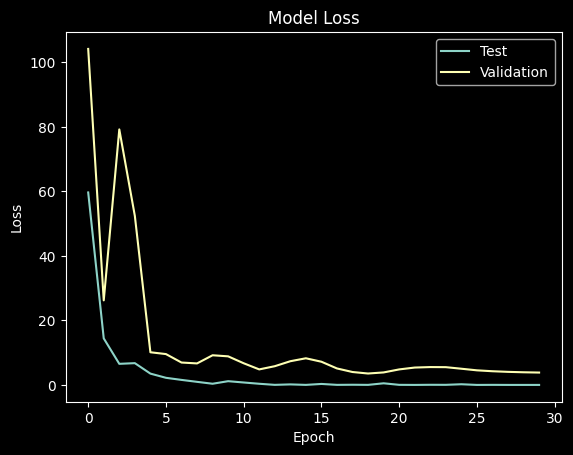

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

Visualize Data

In [ ]:
def names(number):
    if number==1:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

93.92415881156921% Confidence This Is No, Its not a tumor


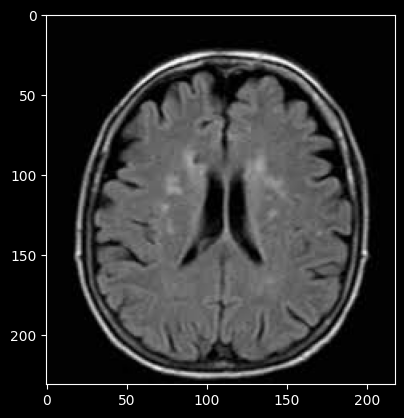

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Brain_Tumor_Classification /Data Set/no/17 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


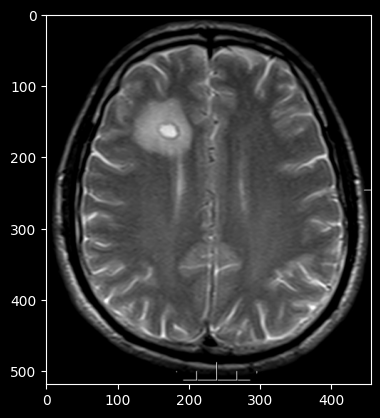

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/Brain_Tumor_Classification /Data Set/yes/Y3.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))